In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')
data.head(5)

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
# Let's convert all objects into numerical classes
from sklearn.preprocessing import LabelEncoder
data['Race'] = LabelEncoder().fit_transform(data['Race'])
data['Marital Status'] = LabelEncoder().fit_transform(data['Marital Status'])
data['N Stage'] = LabelEncoder().fit_transform(data['N Stage'])
data['6th Stage'] = LabelEncoder().fit_transform(data['6th Stage'])
data['differentiate'] = LabelEncoder().fit_transform(data['differentiate'])
data['A Stage'] = LabelEncoder().fit_transform(data['A Stage'])
data['Estrogen Status'] = LabelEncoder().fit_transform(data['Estrogen Status'])
data['Progesterone Status'] = LabelEncoder().fit_transform(data['Progesterone Status'])
data['Status'] = LabelEncoder().fit_transform(data['Status'])
data['T Stage '] = LabelEncoder().fit_transform(data['T Stage '])
data['Grade'] = LabelEncoder().fit_transform(data['Grade'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

In [6]:
data2 = data.copy()

In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Brest Cancer Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
X = data.drop('Status',axis=1)
Y = data['Status']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier()
Rmodel.fit(X_train,y_train)
Rmodel.score(X_test,y_test)

0.9167701863354037

In [11]:
import matplotlib.pyplot as plt
y_pred = Rmodel.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [12]:
#K nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(2) # Define classifier
knn.fit(X_train, y_train) # Train model
knn.score(X_test,y_test)

0.9055900621118013

In [13]:
y_pred = knn.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [14]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model
dt.score(X_test,y_test)

0.901863354037267

In [15]:
y_pred = dt.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [16]:
#Neural network

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

0.9080745341614906

In [17]:
y_pred = mlp.predict(X_test)
plt.scatter(y_test,y_pred)
plt.show()

In [18]:
data3 = data2[['Age','Status']]
y_pred = Rmodel.predict(X)
data3['Prediction'] = y_pred
data3.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Age  Status  Prediction
0   68       0           0
1   50       0           0
2   58       0           0

In [19]:
plt.figure(figsize=(20,15))
plt.scatter(data3['Age'],data3['Status'],label='Actual')
plt.scatter(data3['Age'],data3['Prediction'],label='Predicted',color='r')
plt.title("Brest Cancer")
plt.xlabel("Age")
plt.ylabel("Status")
plt.legend()
plt.show()

In [20]:
from tpot import TPOTRegressor

tpot_automl = TPOTRegressor(generations=10, population_size=10, 
                            verbosity=2, scoring='neg_mean_squared_error',   
                            max_time_mins=10, random_state = 669)

In [21]:
tpot_automl.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0794647301483282

Generation 2 - Current best internal CV score: -0.07944445698316377

Generation 3 - Current best internal CV score: -0.07943068962726091

Generation 4 - Current best internal CV score: -0.07943068962726091

Generation 5 - Current best internal CV score: -0.07943068962726091

Generation 6 - Current best internal CV score: -0.07935562497363043

Generation 7 - Current best internal CV score: -0.07935562497363043

Generation 8 - Current best internal CV score: -0.07935562497363043

Generation 9 - Current best internal CV score: -0.07935562497363043

Generation 10 - Current best internal CV score: -0.07919222841617819

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.6000000000000001, min_samples_leaf=9, min_samples_split=17, n_estimators=100)


TPOTRegressor(generations=10, max_time_mins=10, population_size=10,
              random_state=669, scoring='neg_mean_squared_error', verbosity=2)

In [22]:
tpot_automl.score(X_test, y_test)

-0.06828455904820145

In [23]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-aknj7651
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-aknj7651
  Resolved https://github.com/pycaret/pycaret.git to commit f93e7087a671458a20bed6dd3a8bcca891034cfc
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━

In [24]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'Status', session_id=669)

In [25]:
pycaret_models = compare_models(sort='MSE', budget_time=5)

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [26]:
print(pycaret_models)

GradientBoostingRegressor(random_state=669)


In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model_2 = ExtraTreesRegressor(n_jobs=-1, random_state=669)
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)

0.36940259731955605

In [28]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 670.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.8/410.8 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [29]:
from autogluon.tabular import TabularPredictor
autogluon_automl = TabularPredictor(label='Status', problem_type='regression', eval_metric='mean_squared_error')
autogluon_automl.fit(train_data=data, time_limit=5*60)

No path specified. Models will be saved in: "AutogluonModels/ag-20220817_134312/"
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20220817_134312/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    4024
Train Data Columns: 15
Label Column: Status
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    16833.47 MB
	Train Data (Original)  Memory Usage: 0.48 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Genera

In [30]:
autogluon_automl.leaderboard()

                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.062281       0.022198  4.093670                0.000650           0.323741            2       True         12
1              LightGBM  -0.062656       0.003778  0.644627                0.003778           0.644627            1       True          4
2              CatBoost  -0.063325       0.002102  0.761144                0.002102           0.761144            1       True          6
3               XGBoost  -0.064263       0.015669  2.364158                0.015669           2.364158            1       True          9
4            LightGBMXT  -0.067181       0.004721  0.821558                0.004721           0.821558            1       True          3
5         LightGBMLarge  -0.069121       0.004922  1.610215                0.004922           1.610215            1       True         11
6         ExtraTreesMSE  -0.070654

model  score_val  pred_time_val  fit_time  \
0   WeightedEnsemble_L2  -0.062281       0.022198  4.093670   
1              LightGBM  -0.062656       0.003778  0.644627   
2              CatBoost  -0.063325       0.002102  0.761144   
3               XGBoost  -0.064263       0.015669  2.364158   
4            LightGBMXT  -0.067181       0.004721  0.821558   
5         LightGBMLarge  -0.069121       0.004922  1.610215   
6         ExtraTreesMSE  -0.070654       0.103659  0.931877   
7       RandomForestMSE  -0.070835       0.103160  1.565409   
8       NeuralNetFastAI  -0.074000       0.030871  4.494615   
9        KNeighborsUnif  -0.086800       0.030942  0.547123   
10       KNeighborsDist  -0.087141       0.008209  0.007152   
11       NeuralNetTorch  -0.139437       0.016599  3.570432   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000650           0.323741            2       True   
1                 0.003778           0.644627            1       True   
2                 0.002102           0.761144            1       True   
3                 0.015669           2.364158            1       True   
4                 0.004721           0.821558            1       True   
5                 0.004922           1.610215            1       True   
6                 0.103659           0.931877            1       True   
7                 0.103160           1.565409            1       True   
8                 0.030871           4.494615            1       True   
9                 0.030942           0.547123            1       True   
10                0.008209           0.007152            1       True   
11                0.016599           3.570432            1       True   

    fit_order  
0          12  
1           4  
2           6  
3           9  
4           3  
5          11  
6           7  
7           5  
8           8  
9           1  
10          2  
11         10

In [31]:
autogluon_automl.evaluate(data)

Evaluation: mean_squared_error on test data: -0.057857776381703904
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_squared_error": -0.057857776381703904,
    "root_mean_squared_error": -0.2405364346241623,
    "mean_absolute_error": -0.1340308851671341,
    "r2": 0.5537303169148673,
    "pearsonr": 0.750880844859637,
    "median_absolute_error": -0.05930773913860321
}


{'mean_squared_error': -0.057857776381703904,
 'root_mean_squared_error': -0.2405364346241623,
 'mean_absolute_error': -0.1340308851671341,
 'r2': 0.5537303169148673,
 'pearsonr': 0.750880844859637,
 'median_absolute_error': -0.05930773913860321}

<AxesSubplot:>

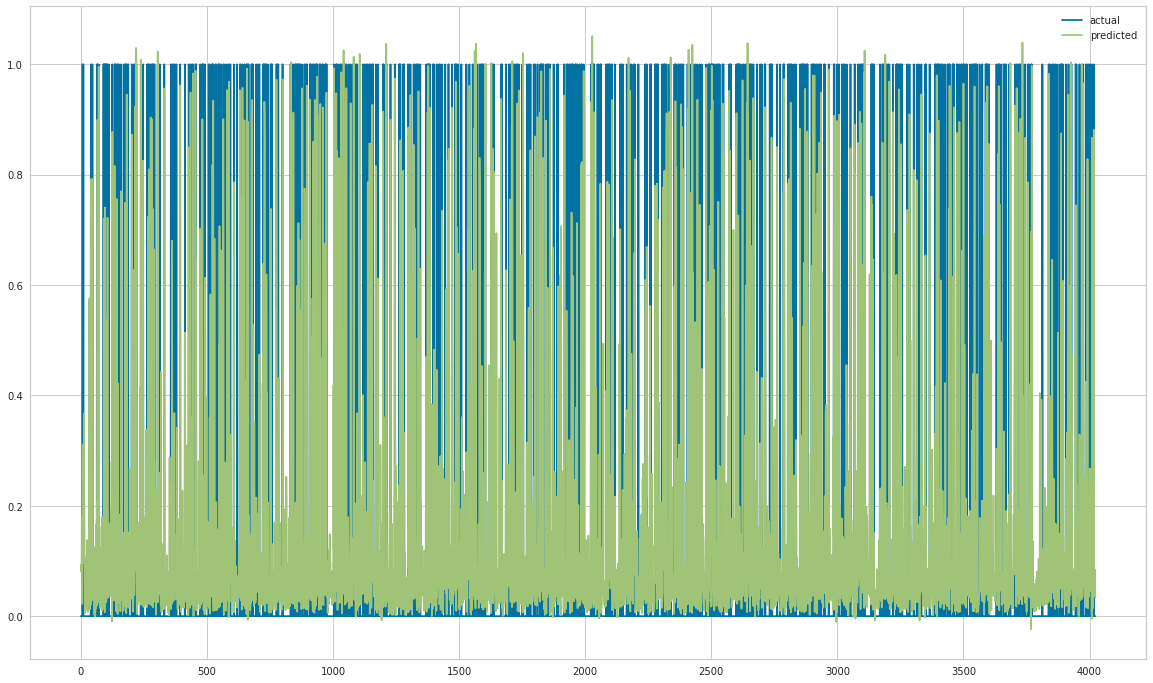

In [32]:
y_pred = autogluon_automl.predict(data)
autogluon_compare = pd.DataFrame(data={'actual': data['Status'], 'predicted': y_pred})
autogluon_compare.plot(figsize=(20, 12))

<AxesSubplot:>

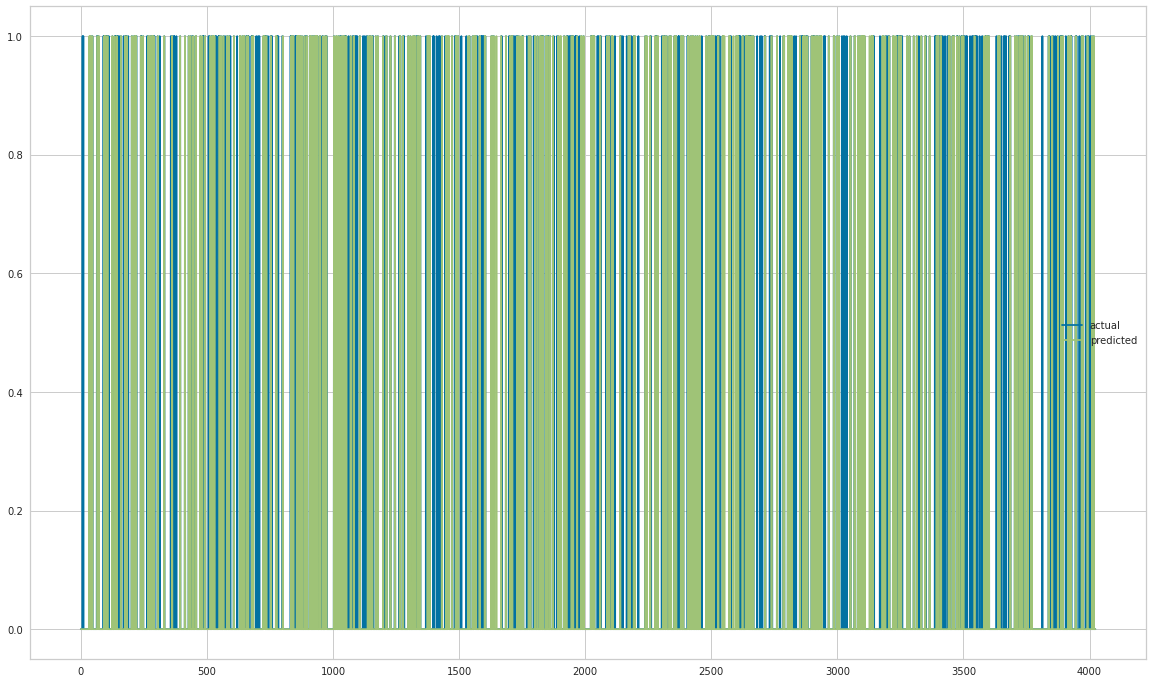

In [33]:
y_pred = autogluon_automl.predict(data)
autogluon_compare = pd.DataFrame(data={'actual': data['Status'], 'predicted': np.round(y_pred)})
autogluon_compare.plot(figsize=(20, 12))

In [34]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4m0mdjxg
  JVM stdout: /tmp/tmp4m0mdjxg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4m0mdjxg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.3
H2O_cluster_version_age:    1 month and 8 days
H2O_cluster_name:           H2O_from_python_unknownUser_oq2gwv
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4.396 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.12 final
--------------------------  ----------------------------------

In [35]:
h2o_frame = h2o.H2OFrame(data)
x = h2o_frame.columns
y = 'Status'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [36]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=667)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |
13:43:43.567: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
13:43:48.495: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


13:43:49.711: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
13:43:55.24: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
13:43:55.790: _response param, We have det

mean         sd  cv_1_valid  cv_2_valid  \
0                     mae    0.155798   0.010929    0.150756    0.150421   
1  mean_residual_deviance    0.075976   0.011263    0.072128    0.070771   
2                     mse    0.075976   0.011263    0.072128    0.070771   
3           null_deviance  104.421740  10.376063  103.604576  101.912130   
4                      r2    0.415125   0.040728    0.416748    0.427241   
5       residual_deviance   61.258780  10.073046   60.371090   58.315025   
6                    rmse    0.275045   0.020199    0.268566    0.266028   
7                   rmsle    0.193257   0.013078    0.189764    0.186823   

   cv_3_valid  cv_4_valid  cv_5_valid  
0    0.171974    0.161441    0.144398  
1    0.092602    0.081146    0.063233  
2    0.092602    0.081146    0.063233  
3  116.198074  111.361750   89.032160  
4    0.355438    0.407540    0.468656  
5   74.544960   65.890720   47.172120  
6    0.304306    0.284862    0.251463  
7    0.212245    0.199428    0.178027

In [37]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id mse rmse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220817_134343 0.0761168 0.275893 0.15591 0.193779 0.0761168 151 0.015752 StackedEnsemble 
 StackedEnsemble_AllModels_4_AutoML_1_20220817_134343 0.0761903 0.276026 0.154766 0.194001 0.0761903 625 0.058471 StackedEnsemble 
 StackedEnsemble_BestOfFamily_5_AutoML_1_20220817_134343 0.0762372 0.276111 0.15488 0.19381 0.0762372 163 0.01871 StackedEnsemble 
 GBM_grid_1_AutoML_1_20220817_134343_model_4 0.0765002 0.276587 0.157548 0.194007 0.0765002 183 0.014239 GBM 
 StackedEnsemble_AllModels_3_AutoML_1_20220817_134343 0.0765971 0.276762 0.155328 0.194616 0.0765971 650 0.065207 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20220817_134343 0.0766142 0.276793 0.155866 0.194941 0.0766142 314 0.031237 StackedEnsemble 
 StackedEnsemble_AllModels_1_AutoML_1_20220817_134343 0.0766957 0.27694 0.156661 0.19517 0.0766957 309 0.025722 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220817_134343 0.0772743 0.277983 0.157831 0.195666 0.0772743 316 0.033972 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220817_134343 0.077409 0.278225 0.159833 0.196108 0.077409 333 0.023163 StackedEnsemble 
 GBM_2_AutoML_1_20220817_134343 0.0774939 0.278377 0.158069 0.195734 0.0774939 238 0.015122 GBM

In [38]:
from h2o.model.regression import h2o_mean_squared_error,h2o_explained_variance_score

h2o_frame_test = h2o.H2OFrame(data)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(data[['Status']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.06323633944453379

In [39]:
h2o_explained_variance_score(y_actual,y_pred)

0.5122891827376677

In [40]:
y_pred = h2o.as_list(y_pred)
y_pred = y_pred.values.flatten()
y_pred.shape

(4024,)

<AxesSubplot:>

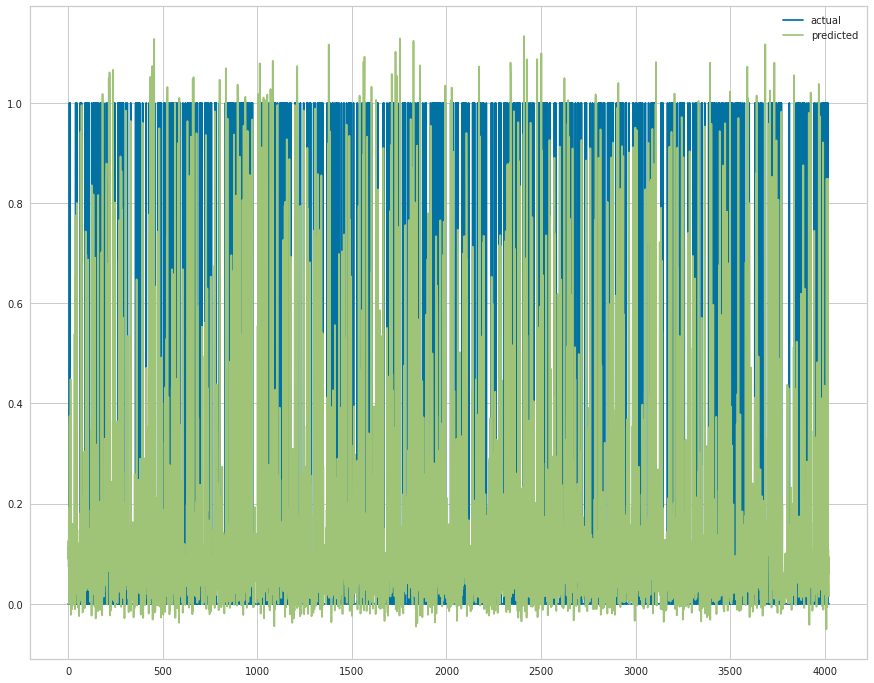

In [41]:
h2o_model = pd.DataFrame(data={'actual': data['Status'], 'predicted': y_pred})
h2o_model.plot(figsize=(15, 12))

<AxesSubplot:>

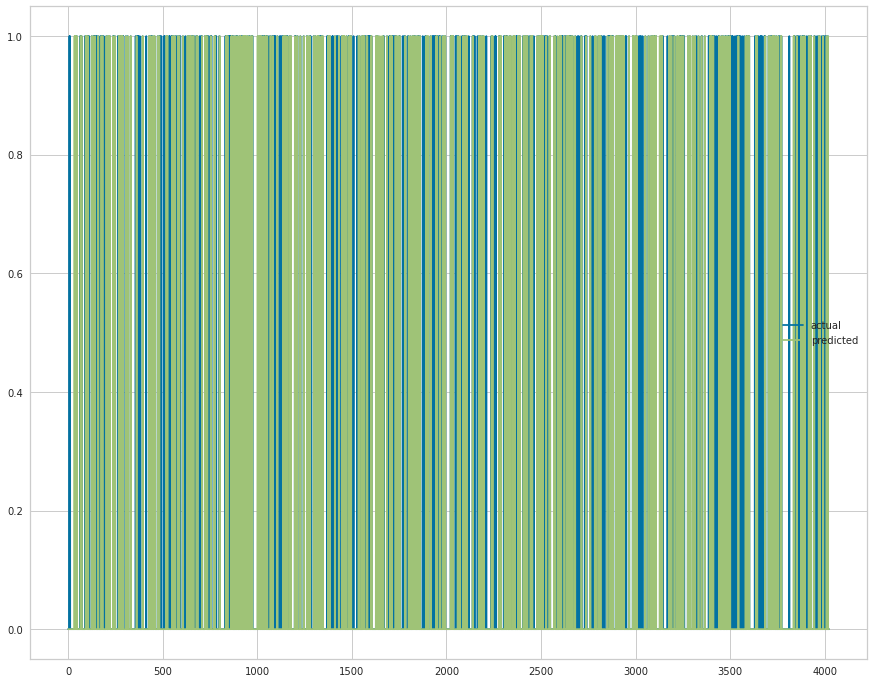

In [42]:
h2o_model = pd.DataFrame(data={'actual': data['Status'], 'predicted': np.round(y_pred)})
h2o_model.plot(figsize=(15, 12))